# 03.01.01 NLTK 자연어 처리 패키지

## 1. NLTK 패키지 설치
## 2. 샘플 말뭉치 다운로드
    - book, movie_reviews, punkt, stopwords

In [ ]:
import nltk
nltk.download("book")
nltk.download("movie_reviews")
nltk.download("punkt")
nltk.download("stopwords")

## 2-1. 구텐베르크 샘플 말뭉치 목록

In [10]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## 2-2. 제인오스틴 - 엠마 말뭉치

In [9]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:702])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.


## 3. 토큰화
    
    - 말뭉치(텍스트 데이터)를 "토큰"이라 불리는 작은 단위로 나누는 행위
    
    - 영어 : '단어'를 토큰으로 사용하는 경우가 일반적
    ex) I am a boy. = I + am + a + boy + .
    
    - 한국어 : 의미가 같은 정규화된 형태소
    ex) 나는 소년이다. = 나 + 는 + 소년 + 이 + 다 + .
    
    
    - 정규화 : 의미와 쓰임이 같은 단어를 같은 토큰으로 표시
    am I a boy? / Am I a boy? 의 'am'과 'Am' 은 같은 토큰
    I am / He is / you are ==>> am is are 는 be 라는 토큰으로 표시
    fly -> fly/v , fly/n ==>> 파리, 날다 라는 것 구분해서 토큰화
    
        1) 대소문자 통합
        2) 어간 추출
        3) 표제어 추출
        4) 품사 부착
        5) 불용어
        
        
        
     - 어간 추출(stemming) : 실제 의미는 같지만, 형태만 다른 경우, 어간과 접사 구분 후 접사 삭제 or 교체
         어간(stem) : 단어의 의미를 담고 있는 핵심 부분
         접사(affix) : 단어에 부가적인 의미를 주는 부분
         
         단순 알고리즘 사용 : PORTER 알고리즘, lancaster 알고리즘
             *사실, 표제어추출 알고리즘을 적용해야 정확하지만, 이는 복잡, 어려워서 일단 부정확하더라도 stemming으로
     we fly
     she flies  ==>> fly가 어간 ==>> fl 이라는 어간이 남음
     she flew 
     
     
     
     - 표제어추출(lemmatization) : wordnet (사전정보) 사용
     
     
     - 품사부착
        품사 = part of speech, POS : 명사, 동사, 형용사, 부사 ...
        동일한 철자 but, 다른 의미 => 다른 토큰화 필요
        ex) permit : 허가하다, 허가증 => 서로 다른 토큰화 필요
   
   
     - 불용어 (stopwords)
         : 분석의 필요성이 없는 단어. 모든 문서에 너무 자주 쓰이는 단어. 너무 드물게 나타나는 단어.
         ex) 관사(a, the, an), 조사(은,는,이,가, ~다)

## 3-1. 토큰화 실습

### 1) 토큰화

    - word_tokenize

In [12]:
# emma_raw 의 일부 데이터 추출
sent = emma_raw[50:196]
print(sent)

Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence


In [13]:
# word_tokenize 메서드 적용
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence']

### 2) 어간추출 (stemming)

    - PorterStemmerLancasterStemmer

In [18]:
from nltk import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print("Porter Stemmer   :", [st1.stem(w) for w in words])
print("Lancaster Stemmer:", [st2.stem(w) for w in words])

Porter Stemmer   : ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer: ['fly', 'fli', 'fly', 'flew', 'flown']


### 3) 표제어추출 (lemmatizer)

    - WordNetLemmatizer

In [20]:
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

[lm.lemmatize(w, pos="v") for w in words]    #pos 아규먼트 : 동사, 형용사 등 품사 명시 (v=동사)

['fly', 'fly', 'fly', 'fly', 'fly']

### 4) 품사 부착

    - 앞뒤의 문맥을 보며, 품사가 무엇인지 태깅해주는 것
    - pos_tag
    
    NNP: 단수 고유명사
    VB: 동사
    VBP: 동사 현재형
    TO: to 전치사
    NN: 명사(단수형 혹은 집합형)
    DT: 관형사

In [22]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

### 5) tokenizer

    - pos_tag 된 상태로 토큰을 아예 만들어버림

In [23]:
def tokenizer(doc):
    return ["/".join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

## 4. NLTK 빈도분석

    2가지 클래스 사용
        1) Text 클래스
        2) FreqDist 클래스

### 4-1) Text 클래스

    - plot : 단어 빈도 그래프
    - dispersion_plot : 단어 위치 그래프
    - concordance : 단어 문맥 인쇄
    - similar : 유사 단어 인쇄
    - plot : 빈도 그래프

**step1) class 객체 생성**

In [27]:
from nltk import Text

text = Text(word_tokenize(emma_raw))
text

<Text: Emma by Jane Austen 1816>

**step2) 단어 빈도 그래프**

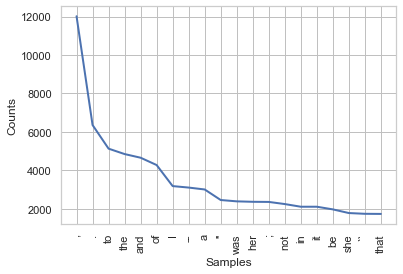

In [28]:
# 가장 많이 사용되는 20개 단어의 빈도 그래프

text.plot(20)

**step3) 단어 위치**

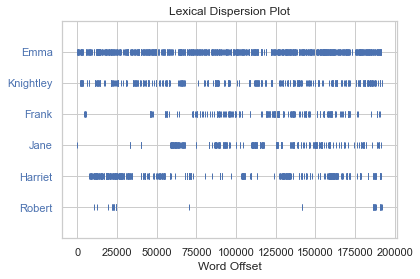

In [31]:
# 전체 스토리 중, 어느 위치 쯤 등장하는 지 확인 가능
# 소설 전체가 20만 단어로 이루어짐(, ! . 등 포함)
# Emma는 주인공이니, 전반적으로 지속적으로 등장함을 확인 가능

text.dispersion_plot(['Emma','Knightley','Frank','Jane','Harriet','Robert'])

**step4) 문맥 인쇄**

    문맥 : 지정한 단어 앞, 뒤에 사용된 단어
    concordance 메서드
    

In [32]:
text.concordance('Emma')

Displaying 25 of 855 matches:
[ Emma by Jane Austen 1816 ] VOLUME I CHAPT
ane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and 
both daughters , but particularly of Emma . Between _them_ it was more the int
 friend very mutually attached , and Emma doing just what she liked ; highly e
r own . The real evils , indeed , of Emma 's situation were the power of havin
ding-day of this beloved friend that Emma first sat in mournful thought of any
ing only half a mile from them ; but Emma was aware that great must be the dif
y . It was a melancholy change ; and Emma could not but sigh over it , and wis
 the rest of her life at Hartfield . Emma smiled and chatted as cheerfully as 
able to tell her how we all are . '' Emma spared no exertions to maintain this
 ' I have a great regard for you and Emma ; but when it comes to the question 
ful , troublesome creature ! '' said Emma playfully . `` That is what you have
e few people who could see faults in Emma Woodhouse , and

**step5) 유사단어 검색**

    지정한 단어의 문맥(앞과 뒤 단어)이 같은 단어를 출력
    similar 메서드
    

In [33]:
# Emma 라는 단어와 문맥이 같은 단어 중, 가장 같은 단어 출력

text.similar('Emma',1)

she


**step6) 공통 문맥 인쇄**

    지정한 2개 단어의 공통 문맥 인쇄
    common_contexts
    

In [36]:
# 분석 결과, 'but emma was' 또는 'but she was'라는 문맥이 제일 많이 사용되었음

text.common_contexts(['Emma','She'],1)

but_was


### 4-2) FreqDist 클래스

    - 문서에 사용된 토큰(단어)의 빈도수 출력
    - Text 클래스의 vocab 메서드
    - 토큰리스트를 넣어서 직접 만들 수 있음
    
        - N : 빈도(횟수)
        - freq : 빈도(%)
        - most_common : 최빈 단어
        - plot : 최빈 단어 플롯

**step1) FreqDist 클래스를 Text 클래스에서 생성**



In [38]:
fd = text.vocab()
type(fd)

nltk.probability.FreqDist

**step2) FreqDist클래스를 토큰 리스트 에서 생성**

    - Emma 말뭉치 -> 사람의 이름만 모아 FreqDist 클래스 객체 생성
    - NNP이면서, 실질적으로는 사람의 이름이 아닌 것은 제외



In [43]:
from nltk import FreqDist

In [51]:
stopwords = ["Mr","Mrs","Miss","Mr.","Mrs.","Dear"]
emma_tokens = pos_tag(word_tokenize(emma_raw))
name_list = [t[0] for t in emma_tokens if t[1] == 'NNP' and t[0] not in stopwords]
fd_name = FreqDist(name_list)
fd_name

FreqDist({'Emma': 829, 'Harriet': 477, 'Weston': 429, 'Elton': 374, 'Knightley': 373, 'Woodhouse': 307, 'Jane': 295, 'Fairfax': 232, 'Churchill': 213, 'Frank': 207, ...})

**step3) 단어 빈도 분석**

    - FreqDist 클래스 : 전체 단어수, 특정 단어 출현 횟수/확률 계산 가능

In [55]:
fd_name.N(), fd_name['Emma'], fd_name.freq('Emma')

(6924, 829, 0.11972848064702483)

In [57]:
fd_name.most_common(5)

[('Emma', 829),
 ('Harriet', 477),
 ('Weston', 429),
 ('Elton', 374),
 ('Knightley', 373)]

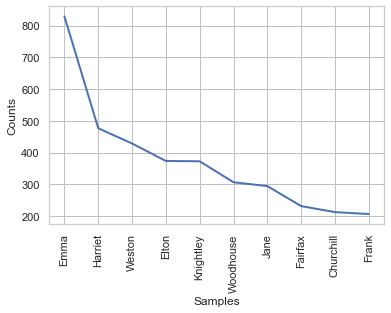

In [61]:
fd_name.plot(10)

## 5. 워드 클라우드



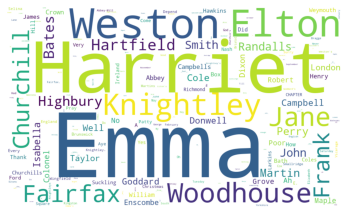

In [67]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.show()

## 예제 : 소설 등장인물 이름 워드클라우드 제작

    - gutenberg corpus 중, "bible-kjv.txt" 제작

In [74]:
# 1. corpus 다운로드

bible_raw = nltk.corpus.gutenberg.raw("bible-kjv.txt")

# # 2. 토큰화 및 포스 태깅

# bible = pos_tag(word_tokenize(bible_raw))

# def tokenizer(doc):
#     return ["/".join(p) for p in doc]

# tokenizer(bible)

# # 3. Text 클래스 객체 생성

# text_bible = Text(word_tokenize(bible_raw))

# # 4. FreqDist 클래스 객체 생성

# fd = text_bible.vocab()
# type(fd)

In [75]:
# 5. 토큰 리스트 생성
stopwords = ["Mr","Mrs","Miss","Mr.","Mrs.","Dear"]
bible_tokens = pos_tag(word_tokenize(bible_raw))

# 6. 이름 리스트 생성
name_list = [name[0] for name in bible_tokens if name[1]=='NNP' and name[0] not in stopwords]

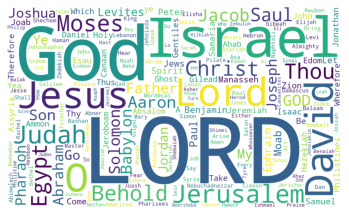

In [77]:
# 7. FreqDist 클래스 객체 생성
fd_name = FreqDist(name_list)

# 8. 워드클라우드 생성
wc = WordCloud(width=1000, height=600, background_color="white", random_state = 0)
plt.imshow(wc.generate_from_frequencies(fd_name))
plt.axis('off')
plt.show()